# NFL Elimination Picks 2024

reqs:
```
pip install requests numpy scipy pandas matplotlib parsel
```

In [1]:
import datetime
import math
import random

import matplotlib.pyplot as plt
import numpy as np

In [2]:
#%load_ext autoreload
#%autoreload 2

In [3]:
import anysunday
import anysunday.powercalcs
from anysunday import viz, pick

In [4]:
schedule = anysunday.loaders.espn_schedule("./schedules/2024.espn")

https://www.espn.com/nfl/fpi

In [5]:
powers = anysunday.loaders.espn_powers()
powers

{'SF': 5.4,
 'BUF': 5.2,
 'KC': 4.6,
 'DET': 3.6,
 'PHI': 3.6,
 'NO': 3.2,
 'NYJ': 3.2,
 'HOU': 2.8,
 'BAL': 2.7,
 'ARI': 1.9,
 'CIN': 1.1,
 'TB': 0.5,
 'ATL': 0.5,
 'DAL': 0.4,
 'MIN': 0.1,
 'JAX': -0.3,
 'LAC': -0.4,
 'SEA': -0.5,
 'CLE': -0.7,
 'LAR': -1.1,
 'CHI': -1.3,
 'IND': -1.4,
 'PIT': -1.5,
 'GB': -2.2,
 'WSH': -3.0,
 'TEN': -3.1,
 'LV': -3.2,
 'NE': -4.8,
 'NYG': -5.3,
 'MIA': -5.8,
 'DEN': -6.1,
 'CAR': -7.1}

In [6]:
top_picks = list(powers)[:len(schedule)]
best_pick = None
best_pick_fitness = -100

def fitness(scores):
    return 100 * min(scores) + sum(scores)

def fitness(scores):
    return 50 * (min(scores) - 3) + sum(scores)

picks = []

HOME_POWER_BUMP = 3.0

for n in range(1_000_000):
    this_pick = top_picks[:]
    random.shuffle(this_pick)
    try:
        scores = anysunday.powercalcs.pick_power_calculator(powers, schedule, this_pick)
    except ValueError:
        continue
    
    pick_fitness = fitness(scores)
    
    if pick_fitness < 0:
        continue

    picks.append([min(scores), sum(scores)])
    
    if pick_fitness < best_pick_fitness:
        continue
    
    print("new high score, round {:>9d}, fitness={:+3.1f}".format(n, pick_fitness))
    best_pick = this_pick
    best_scores = scores
    best_pick_fitness = pick_fitness

new high score, round     57407, fitness=+4.5
new high score, round    135791, fitness=+27.7
new high score, round    285929, fitness=+49.0
new high score, round    481105, fitness=+63.1


In [7]:
anysunday.powercalcs.pick_power_calculator(powers, schedule, best_pick, verbose=True)

week  1: diff  +5.0 - picking ATL (+0.5+H) over PIT (-1.5  )
week  2: diff  +6.1 - picking PHI (+3.6+H) over ATL (+0.5  )
week  3: diff  +3.5 - picking SF  (+5.4  ) over LAR (-1.1+H)
week  4: diff  +6.1 - picking HOU (+2.8+H) over JAX (-0.3  )
week  5: diff  +7.8 - picking SEA (-0.5+H) over NYG (-5.3  )
week  6: diff  +8.7 - picking BAL (+2.7+H) over WSH (-3.0  )
week  7: diff  +7.5 - picking JAX (-0.3+H) over NE  (-4.8  )
week  8: diff  +4.7 - picking ARI (+1.9  ) over MIA (-5.8+H)
week  9: diff  +4.5 - picking MIN (+0.1+H) over IND (-1.4  )
week 10: diff  +3.6 - picking BUF (+5.2  ) over IND (-1.4+H)
week 11: diff  +6.9 - picking DET (+3.6+H) over JAX (-0.3  )
week 12: diff  +8.7 - picking KC  (+4.6  ) over CAR (-7.1+H)
week 13: diff  +5.6 - picking CIN (+1.1+H) over PIT (-1.5  )
week 14: diff  +2.3 - picking DAL (+0.4+H) over CIN (+1.1  )
week 15: diff  +2.1 - picking LAC (-0.4+H) over TB  (+0.5  )
week 16: diff  +2.4 - picking NO  (+3.2  ) over GB  (-2.2+H)
week 17: diff +10.6 - pi

[5.0,
 6.1,
 3.5,
 6.1,
 7.8,
 8.7,
 7.5,
 4.699999999999999,
 4.5,
 3.5999999999999996,
 6.9,
 8.7,
 5.6,
 2.3,
 2.1,
 2.4000000000000004,
 10.6,
 12.0]

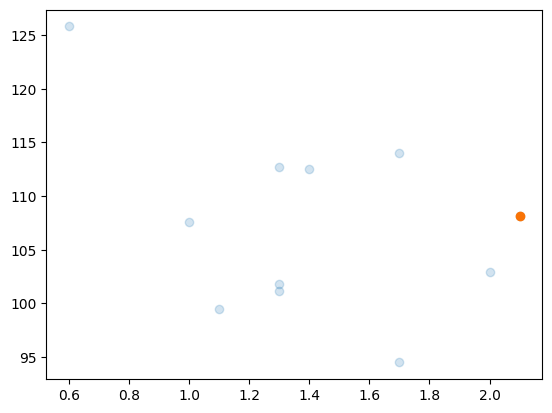

In [8]:
best_scores = anysunday.powercalcs.pick_power_calculator(powers, schedule, best_pick)
best_point = [min(best_scores), sum(best_scores)]

f, ax = plt.subplots()
ax.scatter(*zip(*picks), alpha=0.2)

ax.scatter(*best_point, color="xkcd:orange")

(<Figure size 800x1000 with 2 Axes>,
 <Axes: xlabel='Week', ylabel='Pick to Win'>)

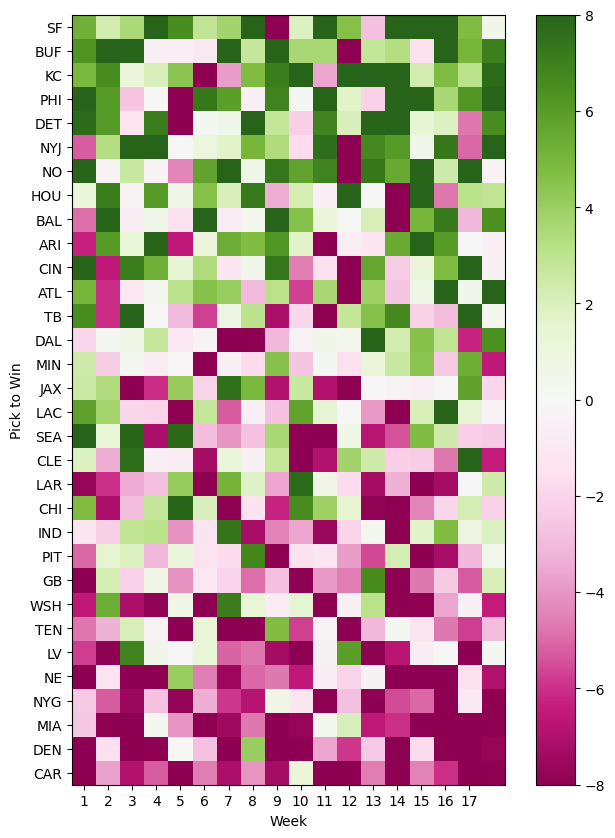

In [9]:
power_rank, matrix = anysunday.powercalcs.pick_grid(powers, schedule, home_bump=3)

viz.plot_matrix(matrix, power_rank)

In [10]:
my_past_picks = [
    "BUF", # week 1
    "BAL", # week 2
    # "SEA", # week 3
]

tuned_home_bump = 3  # default is 3

ppkwargs = {
    "powers": powers,
    "schedule": schedule,
    "home_bump": tuned_home_bump,
    "past_picks": my_past_picks
}

In [11]:
pp = pick.Permuter(**ppkwargs)

pprev = pick.Permuter(**ppkwargs)
pprev.pick = pprev.reverse_greedy()

pprand = pick.Permuter(**ppkwargs)
pprand.pick = pprand.random_greedy()

pplg = pick.Permuter(**ppkwargs)
pplg.pick = pplg.limited_greedy(limit=8)

In [12]:
pp.describe_pick()

week  3: diff +11.0 - picking NYJ (+3.2+H) over NE  (-4.8  )
week  4: diff +13.2 - picking SF  (+5.4+H) over NE  (-4.8  )
week  5: diff  +8.8 - picking CHI (-1.3+H) over CAR (-7.1  )
week  6: diff  +7.3 - picking PHI (+3.6+H) over CLE (-0.7  )
week  7: diff +12.3 - picking NO  (+3.2+H) over DEN (-6.1  )
week  8: diff  +9.7 - picking DET (+3.6+H) over TEN (-3.1  )
week  9: diff  +7.3 - picking CIN (+1.1+H) over LV  (-3.2  )
week 10: diff +13.7 - picking KC  (+4.6+H) over DEN (-6.1  )
week 11: diff  +3.6 - picking ATL (+0.5  ) over DEN (-6.1+H)
week 12: diff  +8.9 - picking HOU (+2.8+H) over TEN (-3.1  )
week 13: diff  +8.7 - picking DAL (+0.4+H) over NYG (-5.3  )
week 14: diff  +6.7 - picking TB  (+0.5+H) over LV  (-3.2  )
week 15: diff  +9.7 - picking ARI (+1.9+H) over NE  (-4.8  )
week 16: diff  +8.7 - picking LAC (-0.4+H) over DEN (-6.1  )
week 17: diff  +8.1 - picking CLE (-0.7+H) over MIA (-5.8  )
week 18: diff  +2.4 - picking LAR (-1.1+H) over SEA (-0.5  )


In [13]:
pprev.describe_pick()

week  3: diff  +8.3 - picking SEA (-0.5+H) over MIA (-5.8  )
week  4: diff  +7.9 - picking ARI (+1.9+H) over WSH (-3.0  )
week  5: diff  +8.8 - picking CHI (-1.3+H) over CAR (-7.1  )
week  6: diff  +3.4 - picking CIN (+1.1  ) over NYG (-5.3+H)
week  7: diff  +7.5 - picking JAX (-0.3+H) over NE  (-4.8  )
week  8: diff  +9.7 - picking DET (+3.6+H) over TEN (-3.1  )
week  9: diff  +7.3 - picking NO  (+3.2  ) over CAR (-7.1+H)
week 10: diff  +7.7 - picking LAR (-1.1+H) over MIA (-5.8  )
week 11: diff  +8.9 - picking SF  (+5.4+H) over SEA (-0.5  )
week 12: diff  +5.9 - picking LV  (-3.2+H) over DEN (-6.1  )
week 13: diff +10.8 - picking KC  (+4.6+H) over LV  (-3.2  )
week 14: diff +13.7 - picking PHI (+3.6+H) over CAR (-7.1  )
week 15: diff +11.6 - picking HOU (+2.8+H) over MIA (-5.8  )
week 16: diff  +8.8 - picking ATL (+0.5+H) over NYG (-5.3  )
week 17: diff +10.6 - picking TB  (+0.5+H) over CAR (-7.1  )
week 18: diff +12.0 - picking NYJ (+3.2+H) over MIA (-5.8  )


In [14]:
pprand.describe_pick()

week  3: diff  +8.3 - picking SEA (-0.5+H) over MIA (-5.8  )
week  4: diff  +7.9 - picking ARI (+1.9+H) over WSH (-3.0  )
week  5: diff  +8.8 - picking CHI (-1.3+H) over CAR (-7.1  )
week  6: diff  +3.4 - picking CIN (+1.1  ) over NYG (-5.3+H)
week  7: diff  +7.5 - picking JAX (-0.3+H) over NE  (-4.8  )
week  8: diff  +9.7 - picking DET (+3.6+H) over TEN (-3.1  )
week  9: diff  +7.3 - picking NO  (+3.2  ) over CAR (-7.1+H)
week 10: diff  +7.7 - picking LAR (-1.1+H) over MIA (-5.8  )
week 11: diff  +9.6 - picking PHI (+3.6+H) over WSH (-3.0  )
week 12: diff  +5.9 - picking LV  (-3.2+H) over DEN (-6.1  )
week 13: diff +10.8 - picking KC  (+4.6+H) over LV  (-3.2  )
week 14: diff  +9.7 - picking SF  (+5.4+H) over CHI (-1.3  )
week 15: diff +11.6 - picking HOU (+2.8+H) over MIA (-5.8  )
week 16: diff  +8.8 - picking ATL (+0.5+H) over NYG (-5.3  )
week 17: diff +10.6 - picking TB  (+0.5+H) over CAR (-7.1  )
week 18: diff +12.0 - picking NYJ (+3.2+H) over MIA (-5.8  )


In [15]:
pplg.describe_pick()

week  3: diff  +8.3 - picking SEA (-0.5+H) over MIA (-5.8  )
week  4: diff +12.3 - picking NYJ (+3.2+H) over DEN (-6.1  )
week  5: diff  +8.8 - picking CHI (-1.3+H) over CAR (-7.1  )
week  6: diff  +7.3 - picking PHI (+3.6+H) over CLE (-0.7  )
week  7: diff +12.3 - picking NO  (+3.2+H) over DEN (-6.1  )
week  8: diff  +9.7 - picking DET (+3.6+H) over TEN (-3.1  )
week  9: diff  +7.3 - picking CIN (+1.1+H) over LV  (-3.2  )
week 10: diff +13.7 - picking KC  (+4.6+H) over DEN (-6.1  )
week 11: diff  +8.9 - picking SF  (+5.4+H) over SEA (-0.5  )
week 12: diff  +8.9 - picking HOU (+2.8+H) over TEN (-3.1  )
week 13: diff  +8.7 - picking DAL (+0.4+H) over NYG (-5.3  )
week 14: diff  +6.7 - picking TB  (+0.5+H) over LV  (-3.2  )
week 15: diff  +9.7 - picking ARI (+1.9+H) over NE  (-4.8  )
week 16: diff  +8.7 - picking LAC (-0.4+H) over DEN (-6.1  )
week 17: diff  +8.1 - picking CLE (-0.7+H) over MIA (-5.8  )
week 18: diff +10.6 - picking ATL (+0.5+H) over CAR (-7.1  )


In [ ]:
def check_until_when(done_flag, best_q, trial_counter=None, permuter=None, method_name="random_greedy"):
    global ppkwargs
    if permuter is None:
        permuter = pick.Permuter(**ppkwargs)

    best_picks = []
    best_fitness = -100
    trials = 0
    while not done_flag.is_set():
        permuter.pick = getattr(permuter, method_name)()

        if permuter.fitness > best_fitness:
            best_picks = permuter.pick
            best_fitness = permuter.fitness
            best_q.put((best_picks, best_fitness))
        trials += 1
        
    if trial_counter is not None:
        with trial_counter.get_lock():
            trial_counter.value += trials
    return trials

In [ ]:
class TestFlag:
    def __init__(self, n_checks=1000):
        self.remaining = n_checks
    def is_set(self):
        self.remaining -= 1
        return self.remaining <= 0
        
test_q = queue.Queue()
start = time.monotonic()
trials = check_until_when(TestFlag(40_000), test_q)
elapsed = time.monotonic() - start
print(f"{trials/elapsed/1000:0.3f}k trials/sec over {elapsed:0.3f} sec")

In [ ]:
proc_time = 60  # desired processing time
n_proc = 24

best_picks = []
best_fitness = -100

done_flag = multiprocessing.Event()
new_best_q = multiprocessing.Queue()
trial_counter = multiprocessing.Value(ctypes.c_long, 0)
processes = [
    multiprocessing.Process(target=check_until_when, args=(done_flag, new_best_q, trial_counter))
    for n
    in range(n_proc)
]

for p in processes:
    p.start()
    
start = time.monotonic()
elapsed = 0
while (elapsed < proc_time) or not new_best_q.empty:
    elapsed = time.monotonic() - start
    if elapsed >= proc_time:
        done_flag.set()
        for p in processes:
            p.join()

    try:
        proc_best_picks, proc_best_fitness = new_best_q.get(timeout=0.1)
        if proc_best_fitness > best_fitness:
            best_picks, best_fitness = proc_best_picks, proc_best_fitness
            # elide already picked picks
            if my_past_picks:
                best_picks = ["..."] + best_picks[len(my_past_picks):]
            print(f"New best {best_fitness/1000:6.1f}k, via: {', '.join(best_picks)}")
    except queue.Empty:
        pass
                
print(f"Tried {trial_counter.value:,d} permutations in {elapsed:0.1f} sec "
      f"({trial_counter.value/elapsed/1000:0.3f}k/sec, {trial_counter.value/elapsed/n_proc/1000:0.3f}k/sec/worker)")

## FiveThirtyEight Elo Data

This data is dead post ABC acquisition. 😞

## Betting lines?

Could use data from sport betting websites; the further out games may not be as well trod, but it could ground the calculations for the current week.